# Introduction

The deformed ring is a ring, plus one node connected to any node in the ring. Like a 'dimple'

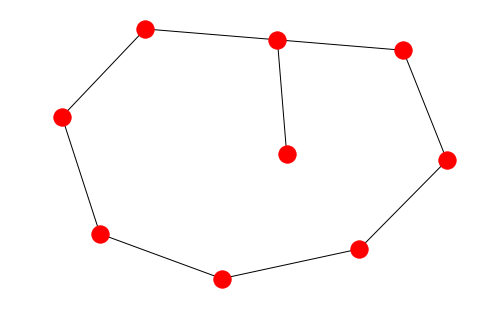

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline


def make_graph(num_nodes):
    N = num_nodes - 1
    G = nx.cycle_graph(N)
    G.add_node(N)
    G.add_edge(N-1, N)
    return G

G = make_graph(9)
nx.draw(G)

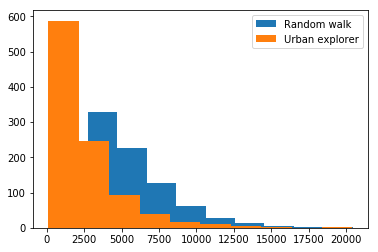

In [15]:
num_nodes = 100
G = make_graph(num_nodes)

num_trials, m = 1000, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

In [16]:
np.mean(Ts_rw), np.mean(Ts_ue)

(5069.804, 2418.129)

### Change the graph

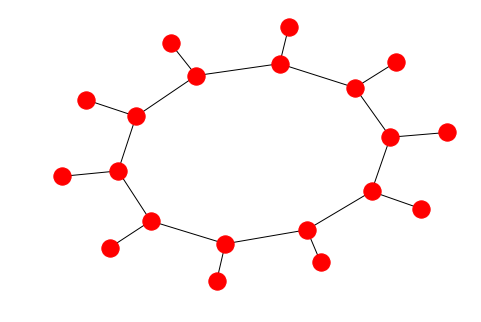

In [21]:
def make_graph1(num_nodes):
    N = num_nodes/2
    G = nx.cycle_graph(N)
    for i in range(N,num_nodes):
        G.add_node(i)
        G.add_edge(i-N, i)
    return G

G = make_graph(20)
nx.draw(G)

(1093.972, 1367.827)

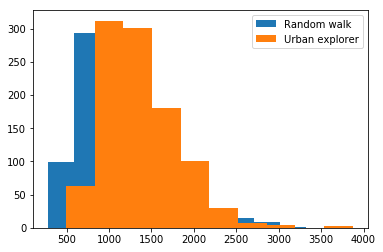

In [25]:
num_nodes = 50
G = make_graph1(num_nodes)

num_trials, m = 1000, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

np.mean(Ts_rw), np.mean(Ts_ue)

Huh, the urban explorer is still better. Interesting.... 

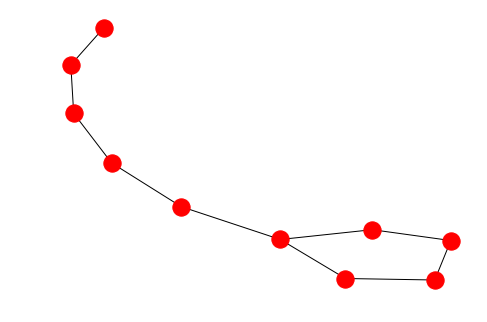

In [38]:
def make_graph2(num_nodes, m = 5):
    """ A balloon! """
    N = num_nodes-m
    G = nx.cycle_graph(N)
    for i in range(m):
        G.add_node(N+i)
        G.add_edge(N+i, N+i-1)
    return G

G = make_graph2(10)
nx.draw(G)

(4847.104, 2265.042)

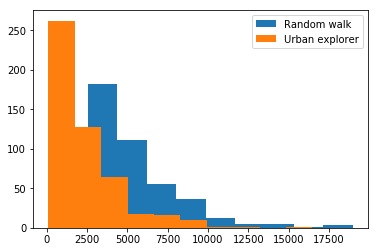

In [40]:
num_nodes = 100
G = make_graph2(num_nodes,m=5)

num_trials, m = 500, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

np.mean(Ts_rw), np.mean(Ts_ue)

Huh, so its NOT the deformed ring. Interesting.

## Be systematic

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


finished N = 1
finished N = 2
finished N = 3
finished N = 4
finished N = 5
finished N = 6
finished N = 7
finished N = 8
finished N = 9
finished N = 10
finished N = 11
finished N = 12
finished N = 13
finished N = 14


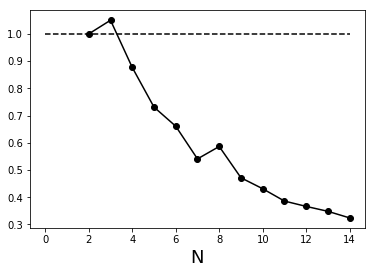

In [29]:
meanTratios = []
Ns = range(1,15)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

In [ ]:
Ts = []
Ns = range(1,1000,50)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    Ts.append(np.mean(T))
    print 'finished N = ' + str(N)
plt.plot(Ns,Ts,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')

finished N = 1
finished N = 51
finished N = 101
finished N = 151


In [ ]:
plt.plot(Ns,Ts,'k.')
plt.plot(Ns,2.5*np.array(Ns),'r--')